## Introduction

How good are a set of translations?

Challenging problem for several reasons:

- There is no a single correct translation
- Many possible translations that are all acceptable
- All correct translations are not available

Automatic evaluation

- Objective and fast to compute
- It allows the comparison among MT systems

Manual evaluation
- Subjective and costly both in time and money
- Adecuacy and fluency

# Automatic evaluation

Two approaches
- Comparison between automatic and reference (manual) translation: WER, **BLEU**, METEOR, **COMET**, etc.
- Quality estimation only from automatic translation

<!--WER: normalised minimum edit distance between automatic and reference translation-->

## Bilingual Evaluation Understudy (BLEU)

BLEU [1] measures the degree of overlapping at different n-gram orders between automatic and reference translations

$$
\text{BLEU} = \text{BP} \cdot \exp \left( \sum_{n=1}^N w_n \log p_n \right)
$$

where:
- $\text{BP} = \left\{ \begin{matrix}1 & \text{if} \; r > c\\\exp({1-\frac{r}{c}}) & \text{if} \; r \leq c \end{matrix} \right.$ 
- $r$ is the total length of reference translations
- $c$ is the total length of automatic translations
- $N$ is maximum n-gram order, usually set to $N=4$ 
- $w_n$ is the weight of the $n$-gram order, usually set to uniform $w_n=\frac{1}{N}$
- $p_n$ is the modified precision of the $n$-gram order. Proportion of automatic $n$-grams matching reference $n$-grams

### Examples of computing modified precision

In [72]:
from nltk.translate.bleu_score import modified_precision

# single reference
refs = [[['the','house','is','blue']],[['my','dog','was','white']]]
autos = [['the','home','is','blue'],['my','dog','was','white']]

for (ref,auto) in zip(refs,autos):
    print(ref); print(auto)
    for n in range (1,5):
        print(f'{n}-gram precision: {modified_precision(ref,auto,n)}')

[['the', 'house', 'is', 'blue']]
['the', 'home', 'is', 'blue']
1-gram precision: 3/4
2-gram precision: 1/3
3-gram precision: 0/2
4-gram precision: 0
[['my', 'dog', 'was', 'white']]
['my', 'dog', 'was', 'white']
1-gram precision: 4/4
2-gram precision: 3/3
3-gram precision: 2/2
4-gram precision: 1


In [22]:
from nltk.translate.bleu_score import modified_precision

# single reference
refs = [[['the','house','is','blue']],[['the','house','the','dog']]]
autos = [['the','the','the','the'],['the','the','the','the']]

for (ref,auto) in zip(refs,autos):
    print(ref); print(auto)
    for n in range (1,2):
        print(f'{n}-gram precision: {modified_precision(ref,auto,n)}')

['the', 'house', 'is', 'blue']
['the', 'the', 'the', 'the']
1-gram precision: 1/4
['the', 'house', 'the', 'dog']
['the', 'the', 'the', 'the']
1-gram precision: 2/4


In [75]:
from nltk.translate.bleu_score import modified_precision

# multiple references
refs = [[['the','house','is','blue'],['the','home','was','white']]]
autos = [['the','home','is','blue']]

for (ref,auto) in zip(refs,autos):
    print(ref); print(auto)
    for n in range (1,5):
        print(f'{n}-gram precision: {modified_precision(ref,auto,n)}')

[['the', 'house', 'is', 'blue'], ['the', 'home', 'was', 'white']]
['the', 'home', 'is', 'blue']
1-gram precision: 4/4
2-gram precision: 2/3
3-gram precision: 0/2
4-gram precision: 0


### Brevity penalty explained

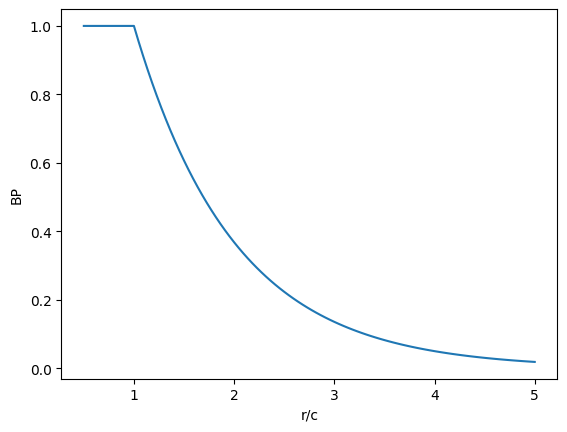

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# ratio = r/c
ratio = np.linspace(0.5, 5.0, 100)
BP = np.where(ratio<1.,1.,np.exp(1-ratio))

fig, ax = plt.subplots()
ax.set_xlabel('r/c')
ax.set_ylabel('BP')
ax.plot(ratio, BP)
plt.show()

In [79]:
from nltk.translate.bleu_score import closest_ref_length, brevity_penalty

# multiple references
refs = [['house','is','blue'],['the','home','was','white']]
auto = ['home','is','blue']

auto_len = len(auto)
ref_len = closest_ref_length(refs,auto_len)

print(f'Multi-reference brevity penalty: {brevity_penalty(ref_len,auto_len)}')

Multi-reference brevity penalty: 1.0


### BLEU computed at sentence and corpus level

In [4]:
from nltk.translate.bleu_score import sentence_bleu

refs = [[['the','house','is','blue']],[['my','dog','was','white']]]
autos = [['the','home','is','blue'],['my','dog','was','white']]

for (ref,auto) in zip(refs,autos):
    print(ref); print(auto)
    print(f'BLEU: {sentence_bleu(ref,auto):.2f}')

[['the', 'house', 'is', 'blue']]
['the', 'home', 'is', 'blue']
BLEU: 0.00
[['my', 'dog', 'was', 'white']]
['my', 'dog', 'was', 'white']
BLEU: 1.00


/home/jorcisai/.local/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/jorcisai/.local/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [5]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

refs = [[['the','house','is','blue']],[['my','dog','was','white']]]
autos = [['the','home','is','blue'],['my','dog','was','white']]

chencherry = SmoothingFunction()
for (ref,auto) in zip(refs,autos):
    print(ref); print(auto)
    print(f'BLEU: {sentence_bleu(ref,auto,smoothing_function=chencherry.method4):.2f}')

[['the', 'house', 'is', 'blue']]
['the', 'home', 'is', 'blue']
BLEU: 0.19
[['my', 'dog', 'was', 'white']]
['my', 'dog', 'was', 'white']
BLEU: 1.00


In [71]:
import math
from collections import Counter
from nltk.translate.bleu_score import brevity_penalty, corpus_bleu

refs = [[['the','house','is','blue']],[['my','dog','was','white']]]
autos = [['home','is','blue'],['my','dog','was','white']]
N = 4

ref_len = 0
auto_len = 0
p_numerators = Counter()
p_denominators = Counter()
for (ref,auto) in zip(refs,autos):
    ref_len += len(ref[0])
    auto_len += len(auto)
    for n in range (1,N+1):
        p = modified_precision(ref,auto,n)
        p_numerators[n] += p.numerator
        p_denominators[n] += p.denominator

geometricMean = 0.0
for n in range (1,N+1):
        geometricMean += 1/N*math.log(p_numerators[n]/p_denominators[n])

print(f'BLEU: {brevity_penalty(ref_len,auto_len) * math.exp(geometricMean):.2f}')


print(f'BLEU: {corpus_bleu(refs,autos):.2f}')

BLEU: 0.60
BLEU: 0.60


## Crosslingual Optimized Metric for Evaluation of Translation (COMET)

COMET [2] is a neural-based evaluation framework that generates estimates of human judgments based on:
<ul>
<li>Direct Assessments (DA)</li>
<li>Human-mediated Translation Edit Rate (HTER)</li>
<li>Multidimensional Quality Metric (MQM) framework </li>
</ul>

In contrast to n-gram-based evaluation measures, such as BLEU, COMET considers in addition the source-language input and pursues:

<ul>
<li>Accurate correlation with human judgements even at sentence level</li>
<li>Greater capacity to differentiate the highest performing systems</li>
</ul>

## Model architectures

Two models are considered: estimator model (regressor) and translation ranking model

Common components: 

<ul>
<li>Cross-lingual encoder based on XLM-RoBERTa applied to source and target</li> 
<li>Pooling layer based layer-wise attention mechanism at word level combined into sentence-level embedding</li>
</ul>

### Estimator model

Combination of sentence-level embeddings or source $s$, hypothesis $h$ and reference $r$

  - Element-wise source product $h \odot s$
  - Element-wise reference product $h \odot r$
  - Element-wise source difference $\vert h - s \vert$
  - Element-wise reference difference $\vert h - r \vert$

These combined features concatenated as $[h;r;h \odot s;h \odot r;h \odot s;\vert h - s \vert;\vert h - r \vert]$ as input to a feed-forward regressor

The model is trained to minimise mean square error between predicted score and DA, HTER and MQM

![Estimator model architecture](figs/EstimatorModelCOMET2020.png)

### Translation Ranking Model
Model receives a tuple $(s,h^+,h^-,r)$ where hypothesis $h^+$ scores higher than $h^-$

Tuple goes through cross-lingual encoder and pooling layer

The triple margin loss is minimised

${\cal L}(s,h^+,h^-,r) = L(s,h^+,h^-) + L(r,h^+,h^-)$

where

$L(u,h^+,h^-) = \max(0, d(u,h^+) - d(u,h^-) + \epsilon)$

and $d(u,v)$ is the Euclidean distance and $\epsilon$, the margin.

The embedding space is optimised so the distance between the anchor $u$ (either $s$ or $r$) and 
$h^-$ is greater than that of $h^+$.

At inference time with only one hypothesis, the score $\hat{f}(s,h,r)$ is the inverse of 
the harmonic mean of the distances from $h$ to $s$ and $r$:

$\hat{f}(s,h,r) = \frac{1}{1 + f(s,h,r)}$

where

$f(s,h,r) = \frac{2 \cdot d(s,h) \cdot d(r,h))}{d(s,h) + d(r,h))}$


![Translation ranking model architecture](figs/TranslationRankingModelCOMET2020.png)

In [6]:
from comet import download_model, load_from_checkpoint

# Choose your model from Hugging Face Hub
# model_path = download_model("Unbabel/XCOMET-XL")
# or for example:
model_path = download_model("Unbabel/wmt22-comet-da")

# Load the model checkpoint:
model = load_from_checkpoint(model_path)

# Data must be in the following format:
data = [
    {
        "src": "la casa es azul",
        "mt": "home is blue",
        "ref": "the house is blue"
    },
    {
        "src": "mi perro era blanco",
        "mt": "my dog was white",
        "ref": "my dog was white"
    }
]
# Call predict method:
model_output = model.predict(data, batch_size=8, gpus=1)
print(model_output)
print(model_output.scores) # sentence-level scores
print(model_output.system_score) # system-level score

# Not all COMET models return metadata with detected errors.
# print(model_output.metadata.error_spans) # detected error spans

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.2.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../../.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/371e9839ca4e213dde891b066cf3080f75ec7e72/checkpoints/model.ckpt`
Encoder model frozen.
/home/jorcisai/.local/lib/python3.10/site-packages/pytorch_lightning/core/saving.py:188: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 29.41it/s]


Prediction([('scores', [0.9247062802314758, 0.9897541403770447]), ('system_score', 0.9572302103042603)])
[0.9247062802314758, 0.9897541403770447]
0.9572302103042603


## Additional bibliography

<ol>
<li><a href="https://aclanthology.org/P02-1040.pdf" target="_blank">K. Papineni et al. Bleu: a Method for Automatic Evaluation of Machine Translation, ACL 2002.</a></li>
<li><a href="https://aclanthology.org/2020.emnlp-main.213.pdf" target="_blank">R. Rei et al. COMET: A Neural Framework for MT Evaluation, EMNLP 2020.</a></li>
<li><a href="https://aclanthology.org/2022.wmt-1.2.pdf" target="_blank">M. Freitag et al. Results of WMT22 Metrics Shared Task: Stop Using BLEU – Neural Metrics Are Better and More Robust, WMT 2022.</a></li>
</ol>